# Init

In [16]:
import pandas as pd
# loading excel data into dataframe variable
data_master = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx")

# Percentage Plot

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\757672154.py:46: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\757672154.py:46: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\757672154.py:46: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\757672154.py:46: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Roaming\Python\Python310\site-packages\matplotlib\text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits

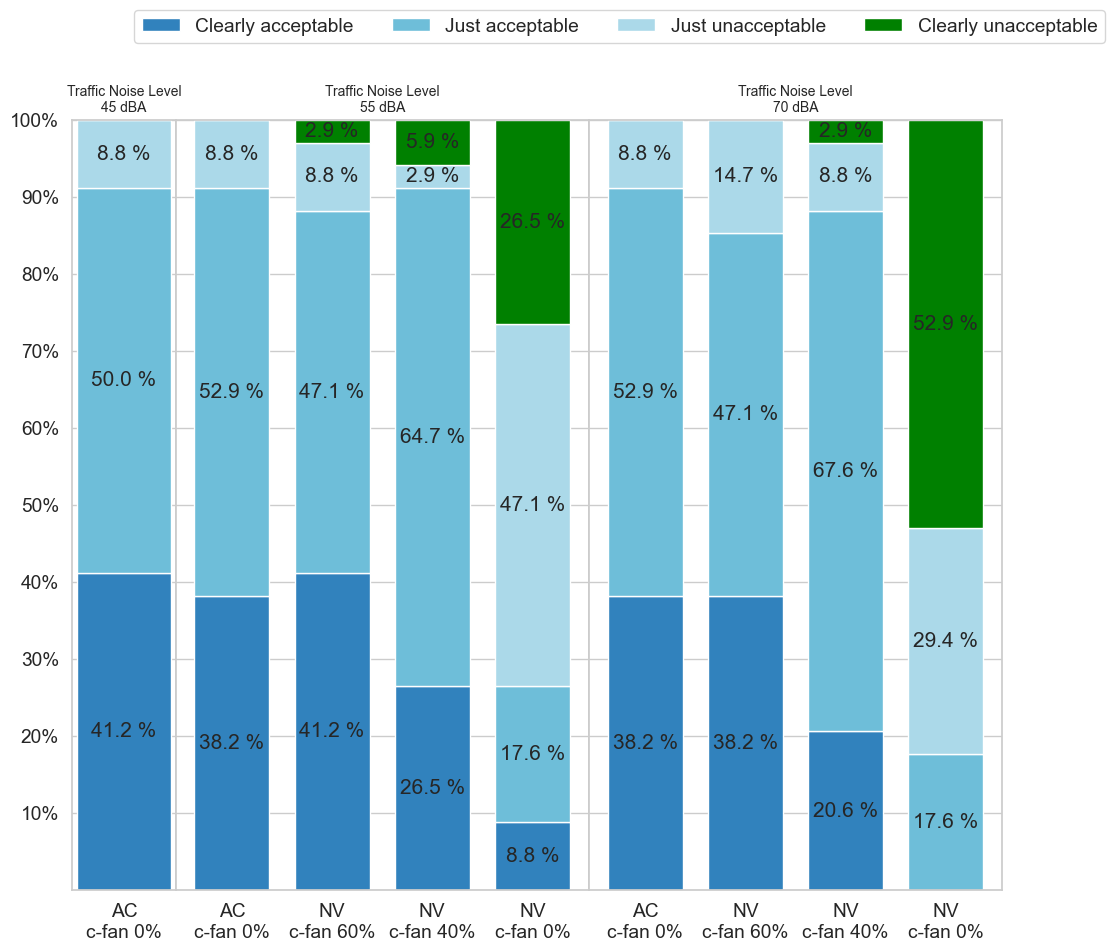

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Prepare the data
x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
y = [4,3,2,1]
colors = [
    ("#3182bd"),
    ("#6ebed9"),
    ("#abd9e9"),
    (0,0.5,0,1),
    ("#ffff99"),
    ("#e6550d"),
    ('#B22222'),
]
labels = ['Clearly unacceptable', 'Just unacceptable', 'Just acceptable', 'Clearly acceptable']
tnl = [45,55,70]

data_y = {}

for tf in tnl:
    data_y[tf] = {}
    for item in y:
        for group in x:
            # print(tf, item, )
            data_slice = data_master[(data_master['ThermalAcceptability']==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
            res = len(data_slice)

            if data_y[tf].get(item, None):
                data_y[tf][item].append(res)
            else:
                data_y[tf][item] = []
                data_y[tf][item].append(res)
        data_y[tf][item] = np.array(data_y[tf][item])

# memo of sample number
for tf in tnl:
    snum = data_y[tf][4]
    for item in y:
        snum = snum + data_y[tf][item]
    snum = snum - data_y[tf][4]
    for item in y:
        data_y[tf][item] = data_y[tf][item]/snum*100

# stack bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
fig.set_figwidth(12)
fig.set_figheight(10)
ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
plt.ylim(0,100)
plt.subplots_adjust(wspace=0)
plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
bar_width = 0.75

# loop for tnl 55
for index, item in enumerate(y):
    data_y[55][list(data_y[55].keys())[index-1]]
    if index == 0:
        ax2.bar(x_labels, data_y[55][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[55][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[55][item]

# loop for tnl 70
for index, item in enumerate(y):
    data_y[70][list(data_y[70].keys())[index-1]]
    if index == 0:
        ax3.bar(x_labels, data_y[70][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[70][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
            if yval > 0:
                ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[70][item]

# loop for tnl 45
for index, item in enumerate(y):
    data_y[45][list(data_y[45].keys())[index-1]]
    if index == 0:
        ax1.bar(x_labels, data_y[45][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[45][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[45][item]

plt.legend(bbox_to_anchor=(-1.1,1.1), loc='lower left', ncol=4, borderaxespad=0.)
plt.show()

In [18]:
# # Prepare the data
# x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
# x_labels = ['AC Fan Off', 'NV Fan 60%', 'NV Fan 40%', 'NV Fan Off']
# # should be change
# y = [7,6,5,4,3,2,1]
# colors = [
#     (1,0.75,0,1),
#     (1,0.9,0,1),
#     (1,0,0.35,0.35),
#     (0,0,0.5,1),
#     (0,0.5,0,1),
#     (1,0.5,0,1),
#     (1,0,0,1),
# ]
# labels = ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neither', 'Somewhat satisfied', 'Satisfied', 'Very satisfied']
# # 
# tnl = [55,70]

# data_y = {}

# for tf in tnl:
#     data_y[tf] = {}
#     for item in y:
#         for group in x:
#             # print(tf, item, )
#             data_slice = data_master[(data_master['ThermalSatisfaction']==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
#             res = len(data_slice)

#             if data_y[tf].get(item, None):
#                 data_y[tf][item].append(res)
#             else:
#                 data_y[tf][item] = []
#                 data_y[tf][item].append(res)
#         data_y[tf][item] = np.array(data_y[tf][item])

# # memo of sample number
# for tf in tnl:
#     snum = data_y[tf][4]
#     for item in y:
#         snum = snum + data_y[tf][item]
#     snum = snum - data_y[tf][4]
#     for item in y:
#         data_y[tf][item] = data_y[tf][item]/snum*100

# # stack bars
# fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
# fig.set_figwidth(12)
# fig.set_figheight(5)
# ax1.set_title('Traffic Noise Level 55 dBa')
# ax2.set_title('Traffic Noise Level 70 dBa')
# plt.ylim(0,100)

# for index, item in enumerate(y):
#     data_y[55][list(data_y[55].keys())[index-1]]
#     if index == 0:
#         ax1.bar(x_labels, data_y[55][item], label=labels[item-1], color = colors[index])
#         sbot = data_y[55][item]
#         for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
#             if yval > 0:
#                 ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
#     else:
#         ax1.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[item-1], color = colors[index])
#         for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
#             if yval > 0:
#                 ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
#         sbot += data_y[55][item]
        
# # add text annotation corresponding to the "total" value of each bar
# # for xpos, ypos, yval in zip(x, y1+y2+y3, snum):
# #     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")


# for index, item in enumerate(y):
#     data_y[70][list(data_y[70].keys())[index-1]]
#     if index == 0:
#         ax2.bar(x_labels, data_y[70][item], label=labels[item-1], color = colors[index])
#         sbot = data_y[70][item]
#         for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
#             if yval > 0:
#                 ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
#     else:
#         ax2.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[item-1], color = colors[index])
#         for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
#             if yval > 0:
#                 ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
#         sbot += data_y[70][item]
# plt.legend(bbox_to_anchor=(0.5,1.01), loc='lower left')
# plt.show()

# Plot 4b

In [19]:
sb_y = ["Rotation_average", "SpatialSpan_average", "DoubleTrouble_average", "FeatureMatch_average","SET"]
sb_y_labels = ["Rotation score", "Spatial span score", "Double trouble score", "Feature match score","SET"]
data_final_plot4b = data_master[['Traffic noise levels', 'Thermal']+sb_y].copy()
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_final_plot4b.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_final_plot4b.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


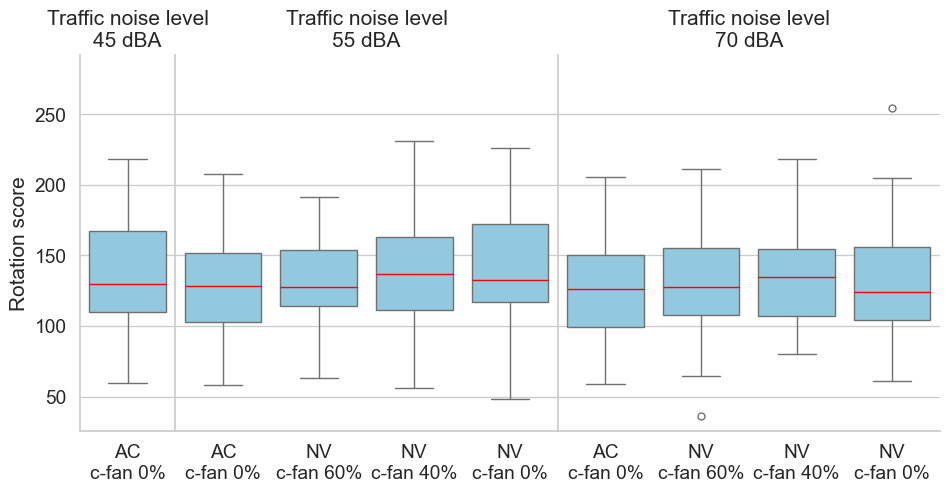

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


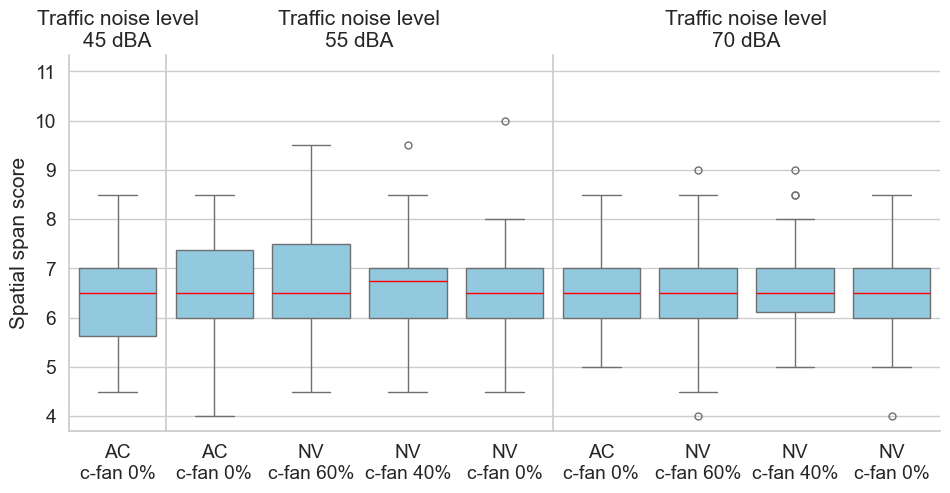

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


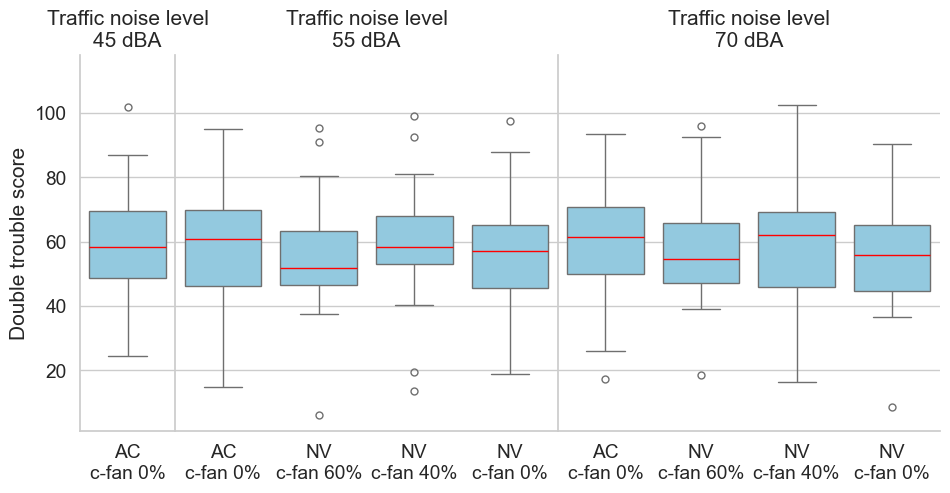

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


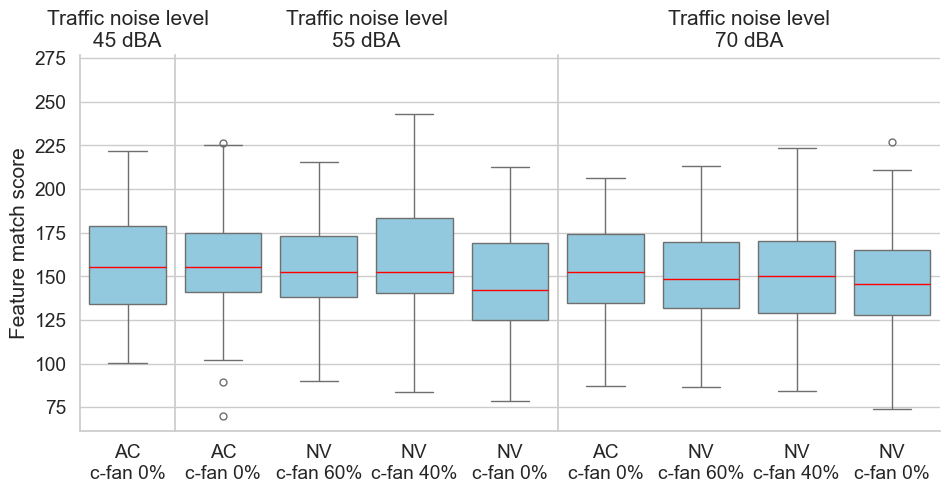

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\524886220.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


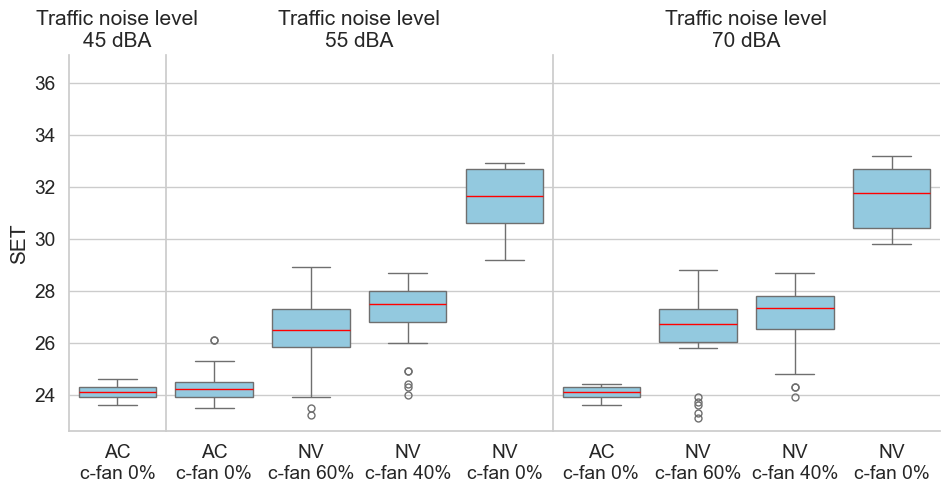

In [20]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")

for i, item in enumerate(sb_y):
    sns.set(font_scale=1.25)
    sns.set_style("whitegrid")
    g = sns.catplot(
        data=data_final_plot4b, 
        x='Thermal', 
        y=item,
        col='Traffic noise levels', kind='box', aspect=0.65,
        facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
        sharex=False,
        legend=False,
        color="skyblue",
        estimator='median',
        medianprops = {'color':'red'},
    )
    for id, ax in enumerate(g.axes_dict.items()):
        if id == 0:
            ax[1].set_xticklabels(["AC\nc-fan 0%"])
        else:
            ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
    g.set_axis_labels("", sb_y_labels[i])
    g.set_titles("Traffic noise level\n{col_name} dBA")
    yLim = g.axes_dict[55].get_ylim()
    g.set(ylim=(yLim[0], yLim[1]*1.1))
    plt.subplots_adjust(wspace=0)
    plt.show(g)

# HR Plot

In [21]:
# from datetime import datetime
# # loading data master
# set_ = [1,2,3,4,5,6]
# id_ = [1,2,3,4,5,6]

# data_HR = pd.DataFrame(columns=['Time','HR','RR','MS','SKINCONTACT','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
# data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
# for set in set_ :
#     for id in id_:
#         data = pd.read_excel(f"../8_resampleHR/HR_set{set}.xlsx", sheet_name=f'id{id}')
#         data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
#         if data_fromV4.empty:
#                 continue
#         list_of_date = []
#         current_date = 0
#         current_data = ""
#         status = True
#         counter = 0
#         for ind, row in data_fromV4.iterrows():
#             date = str(row["End Date"].date())
#             start_clock, end_clock = row['Time_thermal'].split("-")
#             start_time = date+" "+start_clock
#             start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
            
#             if status:
#                 list_of_date.append(start_time)
#                 status = False
#                 current_date = datetime.strptime(date, "%Y-%m-%d").day

#             if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
#                 list_of_date.append(current_data)
#                 list_of_date.append(start_time)
#                 current_date = datetime.strptime(date, "%Y-%m-%d").day

#             end_time = date+" "+end_clock
#             end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
#             current_data = end_time

#             if counter == len(list(data_fromV4.iterrows()))-1:
#                 list_of_date.append(end_time)
            
#             counter+=1
#         data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
#         frames = [data_HR, data]
#         data_HR = pd.concat(frames)
# data_HR.to_excel("HR_compilation.xlsx", index=False)

In [22]:
data_HR = pd.read_excel("HR_compilation.xlsx")
data_HR.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
data_HR = data_HR[data_HR['Speech']==0]
data_HR = data_HR[data_HR['HR']>0]
data_HR = data_HR[~((data_HR['Traffic noise levels']==45) & (data_HR['HR']>130))]
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_HR.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_HR.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\3530399496.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\3530399496.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\3530399496.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


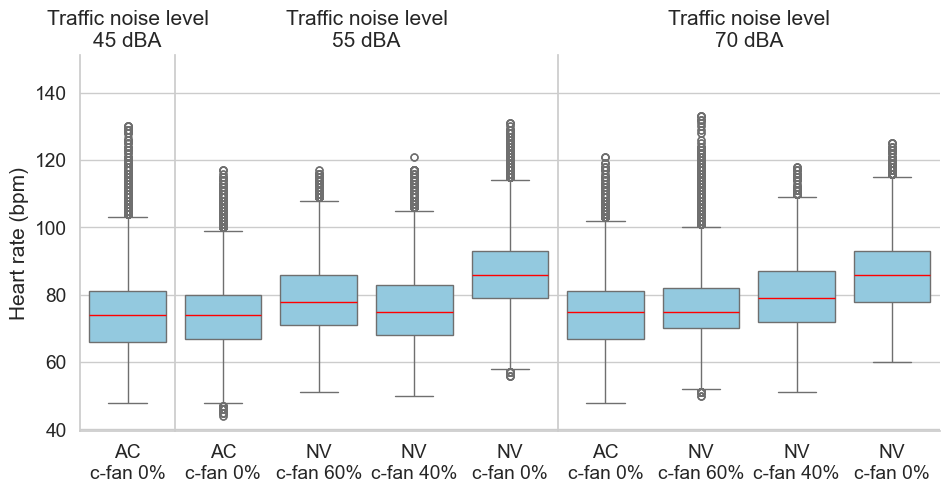

In [23]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_HR['Thermal'] = pd.Categorical(data_HR['Thermal'],["AC", "NV fan 5", "NV fan 3", "NV fan 0"])
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_HR, 
    x='Thermal', 
    y="HR",
    col='Traffic noise levels', kind='box', aspect=0.65,
    # palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    estimator='median',
    medianprops = {'color':'red'},
)
for id, ax in enumerate(g.axes_dict.items()):
    if id == 0:
        ax[1].set_xticklabels(["AC\nc-fan 0%"])
    else:
        ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
g.set_axis_labels("", "Heart rate (bpm)")

plt.subplots_adjust(wspace=0)
# plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.show(g)

# RR Plot

In [29]:
data_RR = data_HR[data_HR['RR']>0].copy()
data_RR = data_RR[(data_RR['RR']<=1500)]
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4} 
data_RR.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_RR.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\954358742.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\954358742.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\954358742.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


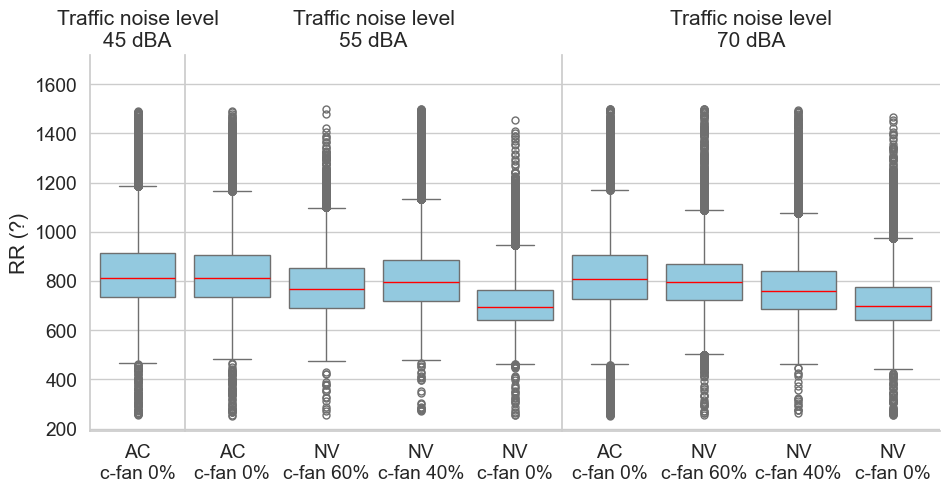

In [30]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_RR, 
    x='Thermal', 
    y="RR",
    col='Traffic noise levels', kind='box', aspect=0.65,
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    estimator='median',
    medianprops = {'color':'red'},
)
for id, ax in enumerate(g.axes_dict.items()):
    if id == 0:
        ax[1].set_xticklabels(["AC\nc-fan 0%"])
    else:
        ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
g.set_axis_labels("", "RR (ms)")
plt.subplots_adjust(wspace=0)
plt.show(g)

# RR With Correction

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\4259190888.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\4259190888.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\4259190888.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


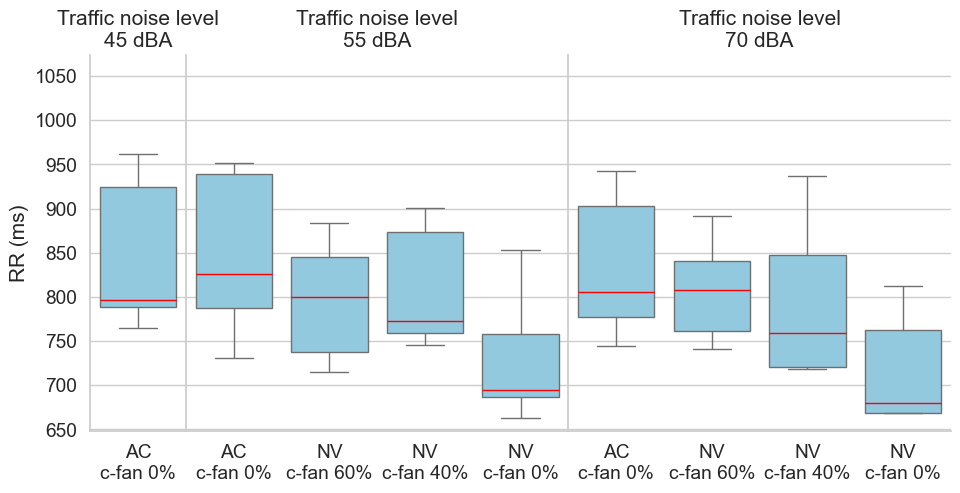

In [35]:
data_RR_average = pd.read_excel("../0_dataset_master/Experiment_edited_V7_rr_with_correction.xlsx")

import matplotlib.pyplot as plt

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_RR_average.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_RR_average.reset_index(inplace=True)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_RR_average, 
    x='Thermal', 
    y="rr_mean",
    col='Traffic noise levels', kind='box', aspect=0.65,
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    estimator='median',
    medianprops = {'color':'red'},
)

for id, ax in enumerate(g.axes_dict.items()):
        if id == 0:
            ax[1].set_xticklabels(["AC\nc-fan 0%"])
        else:
            ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
g.set_axis_labels("", "RR (ms)")
plt.subplots_adjust(wspace=0)
plt.show(g)

# SkinT Plot

In [ ]:
# loading data master
# from datetime import datetime

# set_ = [1,2,3,4,5,6]
# id_ = [1,2,3,4,5,6]

# date = {
#     1:[10,11],
#     2:[12,13],
#     3:[17,18],
#     4:[19,20],
#     5:[24,25],
#     6:[26,27]
# }

# data_SkinT = pd.DataFrame(columns=['Time','Unit','1','2','3','4','Tmsk','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
# data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
# try:
#     for set in set_ :
#         for id in id_:
#             data = pd.read_excel(f"../7_resampleIntoEachSet/SkinT_set{set}_adjustment.xlsx", sheet_name=f'idid{id}')
#             data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
#             if data_fromV4.empty:
#                 continue
#             list_of_date = []
#             current_date = 0
#             current_data = ""
#             status = True
#             counter = 0
#             for ind, row in data_fromV4.iterrows():
#                 date = str(row["End Date"].date())
#                 start_clock, end_clock = row['Time_thermal'].split("-")
#                 start_time = date+" "+start_clock
#                 start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
                
#                 if status:
#                     list_of_date.append(start_time)
#                     status = False
#                     current_date = datetime.strptime(date, "%Y-%m-%d").day

#                 if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
#                     list_of_date.append(current_data)
#                     list_of_date.append(start_time)
#                     current_date = datetime.strptime(date, "%Y-%m-%d").day

#                 end_time = date+" "+end_clock
#                 end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
#                 current_data = end_time

#                 if counter == len(list(data_fromV4.iterrows()))-1:
#                     list_of_date.append(end_time)
                
#                 counter+=1
#             data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
#             frames = [data_SkinT, data]
#             data_SkinT = pd.concat(frames)
# except ValueError as e:
#     print(e)
#     print(set, id)
# except IndexError as e:
#     print(e)
#     print(set, id)
# data_SkinT.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
# data_SkinT = data_SkinT[data_SkinT['Speech']==0]
# data_SkinT.to_excel("SkinT_compilation.xlsx", index=False)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\1651227625.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\1651227625.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\1651227625.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


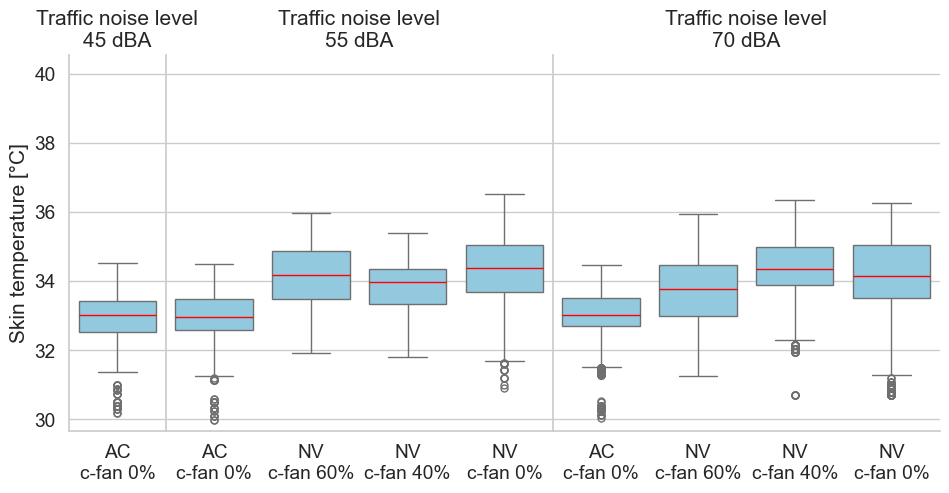

In [ ]:
data_SkinT = pd.read_excel("SkinT_compilation.xlsx")

import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_SkinT['Thermal'] = pd.Categorical(data_SkinT['Thermal'],["AC", "NV fan 5", "NV fan 3", "NV fan 0"])
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_SkinT.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_SkinT.reset_index(inplace=True)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_SkinT, 
    x='Thermal', 
    y="Tmsk",
    col='Traffic noise levels', kind='box', aspect=0.65,
    # palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    estimator='median',
    medianprops = {'color':'red'},
)

for id, ax in enumerate(g.axes_dict.items()):
        if id == 0:
            ax[1].set_xticklabels(["AC\nc-fan 0%"])
        else:
            ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
    
# plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
g.set_axis_labels("", "Skin temperature [°C]")
plt.subplots_adjust(wspace=0)
plt.show(g)

# Plot From V5

In [ ]:
import pandas as pd
data_v5 = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx")
data_v5.dropna(subset=['Average_tmsk', 'Average_HR','Thermal', 'Traffic noise levels'], inplace=True)
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_v5.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\69929982.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\69929982.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\69929982.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


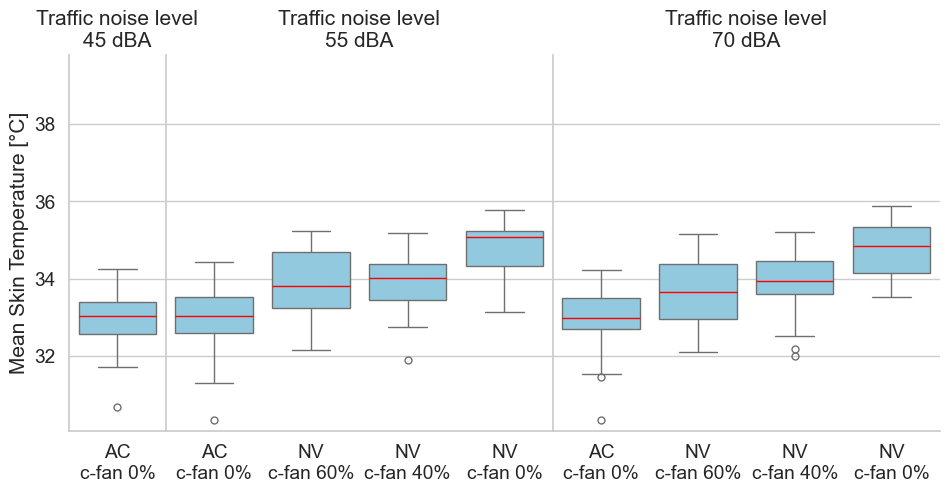

In [ ]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
import seaborn as sns

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_v5.reset_index(inplace=True)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_v5, 
    x='Thermal', 
    y="Average_tmsk",
    col='Traffic noise levels', kind='box', aspect=0.65,
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    medianprops = {'color':'red'},
)
for id, ax in enumerate(g.axes_dict.items()):
    if id == 0:
        ax[1].set_xticklabels(["AC\nc-fan 0%"])
    else:
        ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))    
# plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.subplots_adjust(wspace=0)
g.set_axis_labels("", "Mean Skin Temperature [°C]")
plt.show(g)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\2211815625.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\2211815625.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\2211815625.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


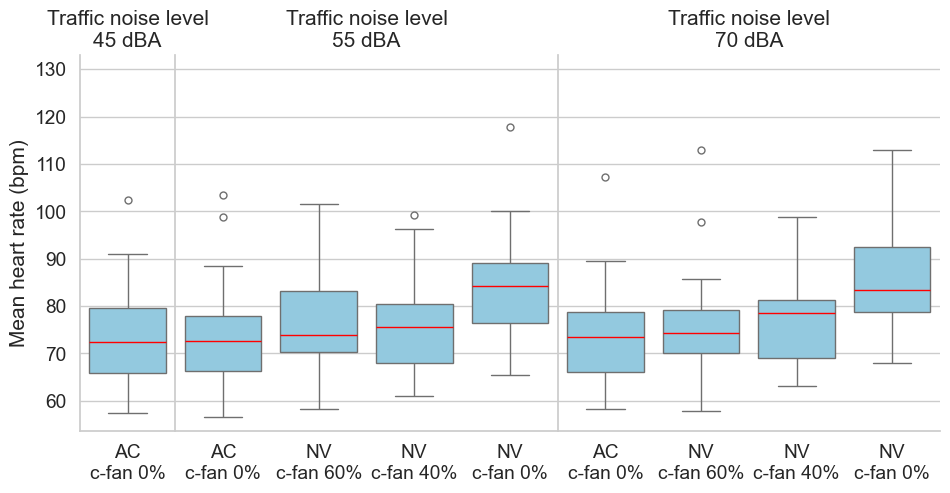

In [ ]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
import seaborn as sns

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_v5, 
    x='Thermal', 
    y="Average_HR",
    col='Traffic noise levels', kind='box', aspect=0.65,
    # palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    medianprops = {'color':'red'},
)
for id, ax in enumerate(g.axes_dict.items()):
        if id == 0:
            ax[1].set_xticklabels(["AC\nc-fan 0%"])
        else:
            ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
    
# plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.subplots_adjust(wspace=0)
g.set_axis_labels("", "Mean heart rate (bpm)")
plt.show(g)

# SET Perminute

C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\59250295.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\59250295.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_19028\59250295.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])


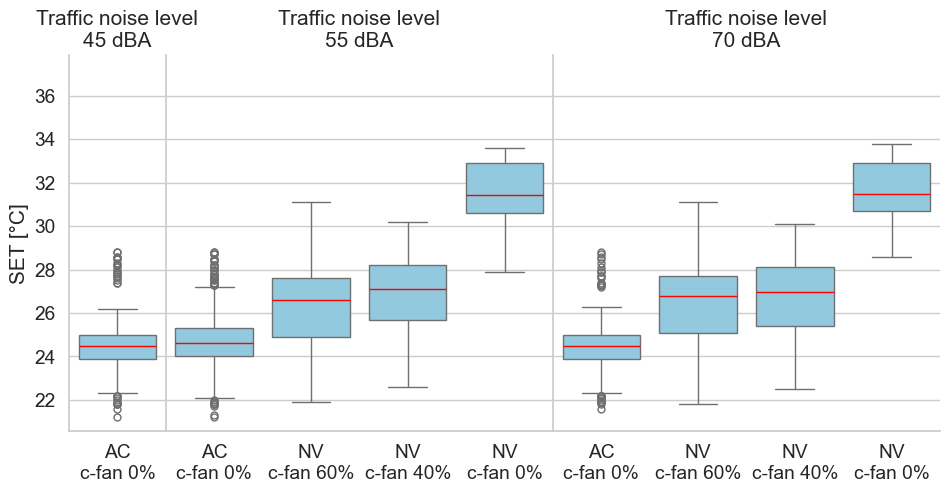

In [34]:
data_SET_perminute = pd.read_excel("../0_dataset_master/ThermalData_perminute_v2.xlsx")

import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
# green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
# orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
# red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_SkinT['Thermal'] = pd.Categorical(data_SkinT['Thermal'],["AC", "NV fan 5", "NV fan 3", "NV fan 0"])
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_SET_perminute.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_SET_perminute.reset_index(inplace=True)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
g = sns.catplot(
    data=data_SET_perminute, 
    x='Thermal', 
    y="SET",
    col='TrafficNoiseLevels', kind='box', aspect=0.65,
    # palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False,
    color="skyblue",
    estimator='median',
    medianprops = {'color':'red'},
)

for id, ax in enumerate(g.axes_dict.items()):
        if id == 0:
            ax[1].set_xticklabels(["AC\nc-fan 0%"])
        else:
            ax[1].set_xticklabels(["AC\nc-fan 0%","NV\nc-fan 60%", "NV\nc-fan 40%", "NV\nc-fan 0%"])
g.set_titles("Traffic noise level\n{col_name} dBA")
yLim = g.axes_dict[55].get_ylim()
g.set(ylim=(yLim[0], yLim[1]*1.1))
    
# plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
g.set_axis_labels("", "SET [°C]")
plt.subplots_adjust(wspace=0)
plt.show(g)